In [3]:
library(gridExtra)
library(matrixStats)
library(dplyr)
library(rlang)
library(reshape2)
library(clusterCrit)
library(grid)
library(ggrepel)
library(RColorBrewer)
library(dplyr)
library(IRdisplay)
library(scales)
library(survival)
library(corrplot)
library(Hmisc)
library(ggplot2)
library(survminer)

library(muhaz)

options(warn=-1)

source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools_yanis.R')
source("../../../src/merge_df.R")
source("../../../src/my_toolbox.R")
source("../../../src/my_components.R")
source("../../../src/my_utils.R")
source("../../../src/ggstyles.R")
source("../../../src/my_hotspots.R")
###


theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed
f <- read.table("df_final_full_component_ITD.tsv")

In [122]:
pdf("graphs/Mutations_Patient_18+years_old.pdf",width=25,height=10)
set_notebook_plot_size(25,10)
tmp <- NULL
for (gene in c("NPM1","ITD","DNMT3A","RAD21","SMC1A")){
  tmp1 <- df[df[,gene]==1,]
  tmp1$comparison = gene
  tmp <-rbind(tmp,tmp1)
}


surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier estimates by taregeted genes",palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))
p
plot_list <- list()
for (principal_gene in c("NPM1","ITD","DNMT3A","RAD21","SMC1A")){
    
    tmp <- NULL
    for (gene in c("NPM1","ITD","DNMT3A","RAD21","SMC1A")){
          if(gene==principal_gene){
              tmp1 <- df[df[,principal_gene]==1 ,]
              tmp1$comparison = paste(principal_gene,"overall",sep="_")
          }else{
              tmp1 <- df[df[,principal_gene]==1 & df[,gene]==1,]
              tmp1$comparison = paste(gene,principal_gene,sep="_")
          }
      tmp <-rbind(tmp,tmp1)
    }
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    plot_list[[principal_gene]]<- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = paste("Kaplan-Meier ",sep=principal_gene," comutations"),palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))
    
}

arrange_ggsurvplots(plot_list,ncol=2)

tmp <-NULL
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$RAD21==1,]
tmp1$comparison <- "NPM1 ITD RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$DNMT3A==1 & df$RAD21==1,]
tmp1$comparison <- "NPM1 DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$DNMT3A==1 & df$SMC1A==1,]
tmp1$comparison <- "NPM1 DNMT3A SMC1A"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$ITD==1 & df$DNMT3A==1 & df$RAD21==1,]
tmp1$comparison <- "ITD DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$SMC1A==1,]
tmp1$comparison <- "NPM1 ITD SMC1A"
tmp <- rbind(tmp,tmp1)

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier estimates Triplet Mutations",palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00","#000000"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))

p

tmp <- NULL
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1 &df$SMC1A==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A SMC1A"
tmp <- rbind(tmp,tmp1)

tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1 &df$RAD21==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier Quadruplet Mutations",palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00","#000000"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))

p
dev.off()

pdf 
  2

In [110]:
dd <- data.frame(matrix(ncol=2))
colnames(dd)<- c("genes_mut","count")
i <-1
for (gen in c("NPM1","ITD","DNMT3A","RAD21","SMC1A")){
    for (ge in c("ITD","DNMT3A","RAD21","SMC1A")){
        for (g in c("DNMT3A","RAD21","SMC1A")){
            if (!(gen==ge | gen==g | ge==g)){
                dd[i,] <- c(paste(gen,ge,g),dim(df[df[,gen]==1 & df[,ge]==1 & df[,g]==1,])[1])
                i <- i+1
                }
            }
        }
}
dd$count <- as.numeric(dd$count)
dd <- dd[dd$count>8,]
dd <- dd[order(dd$count,decreasing=T),]
rownames(dd) <- dd$genes_mut
dd[c("NPM1 ITD DNMT3A","NPM1 ITD RAD21","NPM1 DNMT3A RAD21","NPM1 DNMT3A SMC1A","ITD DNMT3A RAD21","NPM1 ITD SMC1A"),]


,genes_mut,count
NPM1 ITD DNMT3A,NPM1 ITD DNMT3A,156
NPM1 ITD RAD21,NPM1 ITD RAD21,21
NPM1 DNMT3A RAD21,NPM1 DNMT3A RAD21,21
NPM1 DNMT3A SMC1A,NPM1 DNMT3A SMC1A,15
ITD DNMT3A RAD21,ITD DNMT3A RAD21,13
NPM1 ITD SMC1A,NPM1 ITD SMC1A,9


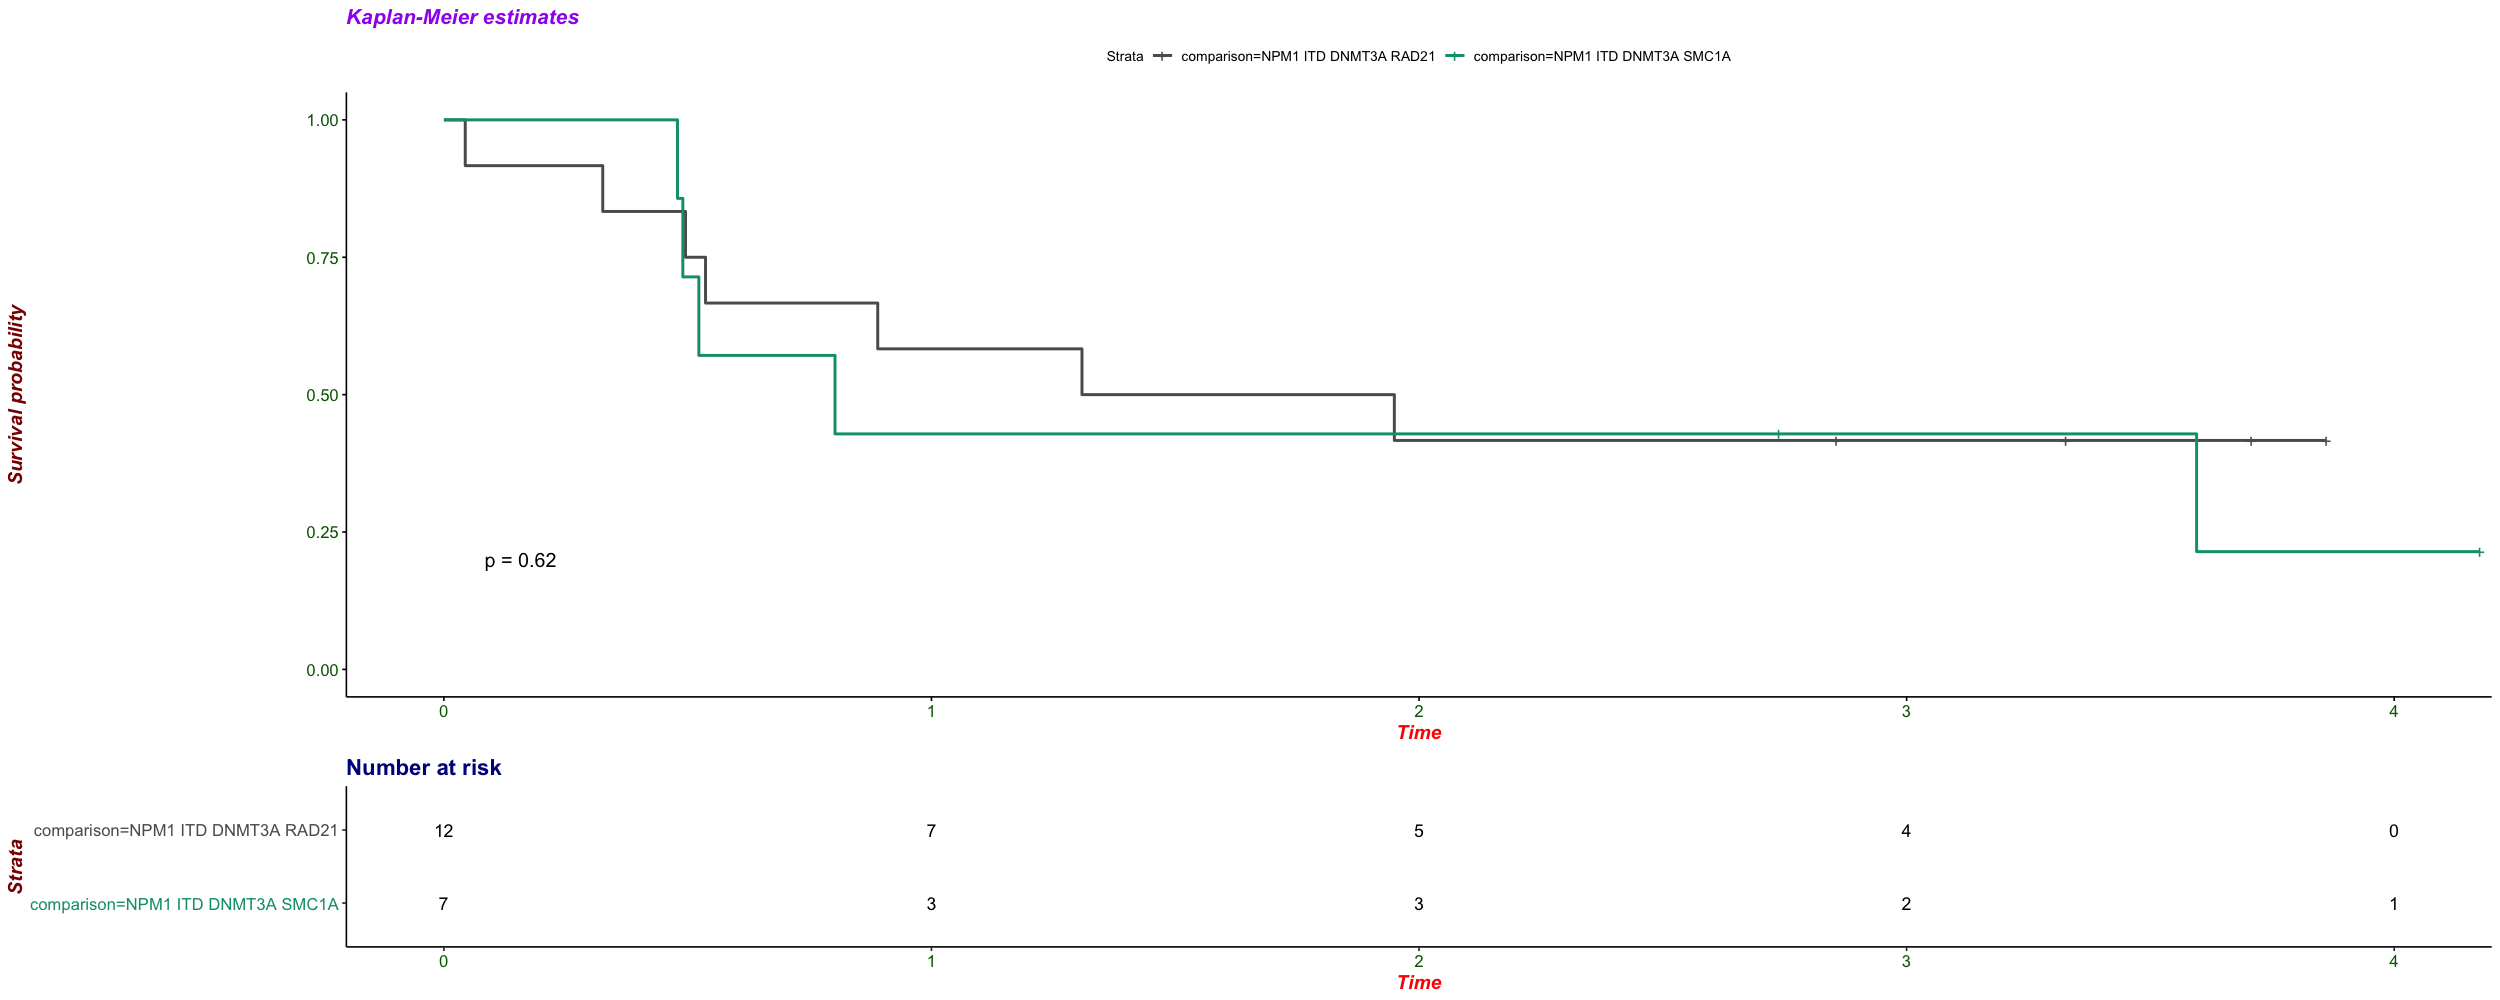

In [119]:
tmp <-NULL
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$RAD21==1,]
tmp1$comparison <- "NPM1 ITD RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$DNMT3A==1 & df$RAD21==1,]
tmp1$comparison <- "NPM1 DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$DNMT3A==1 & df$SMC1A==1,]
tmp1$comparison <- "NPM1 DNMT3A SMC1A"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$ITD==1 & df$DNMT3A==1 & df$RAD21==1,]
tmp1$comparison <- "ITD DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$SMC1A==1,]
tmp1$comparison <- "NPM1 ITD SMC1A"
tmp <- rbind(tmp,tmp1)

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier estimates",palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00","#000000"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))

tmp <- NULL
tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1 &df$SMC1A==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A SMC1A"
tmp <- rbind(tmp,tmp1)

tmp1 <- df[df$NPM1==1 & df$ITD==1 & df$DNMT3A==1 &df$RAD21==1,]
tmp1$comparison <- "NPM1 ITD DNMT3A RAD21"
tmp <- rbind(tmp,tmp1)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier estimates",palette=c("#5C5C5C","#009E73","#2b8cbe","#D55E00","#e79f00","#000000"),
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "darkblue"),
                 font.submain = c(15, "bold.italic", "purple"),
                 font.caption = c(14, "plain", "orange"),
                 font.x = c(14, "bold.italic", "red"),
                 font.y = c(14, "bold.italic", "darkred"),
                 font.tickslab = c(12, "plain", "darkgreen")))
p

[1]   0 195